In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv("Tesla.csv", parse_dates = ['Date'])

In [3]:
df.columns.tolist()

['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']

In [4]:
# df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,01/02/2015,14.858000,14.883333,14.217333,14.620667,71466000
1,1,01/05/2015,14.303333,14.433333,13.810667,14.006000,80527500
2,2,01/06/2015,14.004000,14.280000,13.614000,14.085333,93928500
3,3,01/07/2015,14.223333,14.318667,13.985333,14.063333,44526000
4,4,01/08/2015,14.187333,14.253333,14.000667,14.041333,51637500


In [6]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
2269,2269,01/09/2024,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,01/10/2024,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,01/11/2024,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,01/12/2024,220.080002,225.339996,217.149994,218.889999,122889000
2273,2273,16/01/2024,215.100006,223.490005,212.180100,219.910004,115064708


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB


In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)



## A scatterplot of Closing Price Against Year

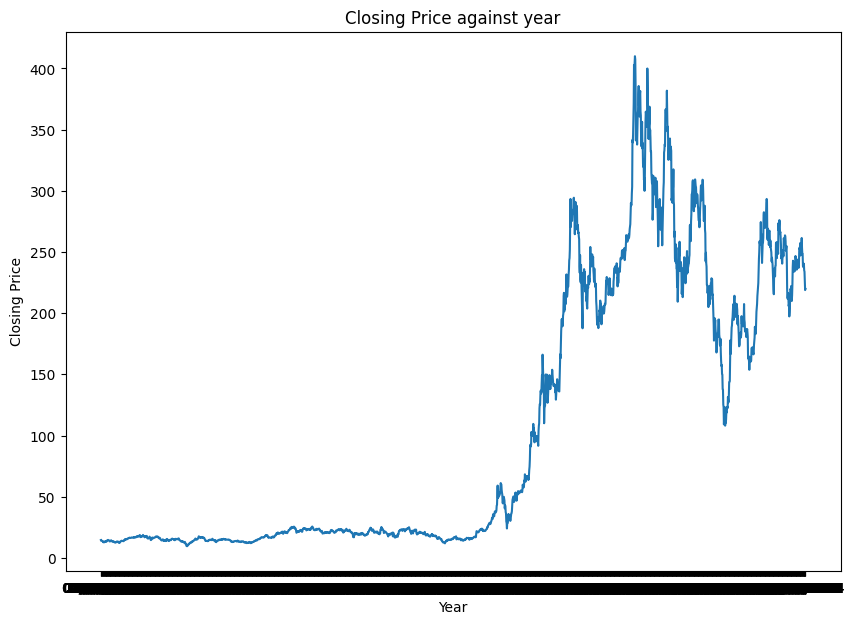

In [9]:
plt.figure(figsize = (10,7))
plt.plot(df['Date'],df['Close'])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Closing Price against year")
plt.show()

## A scatterplot of Opening Price Against Year

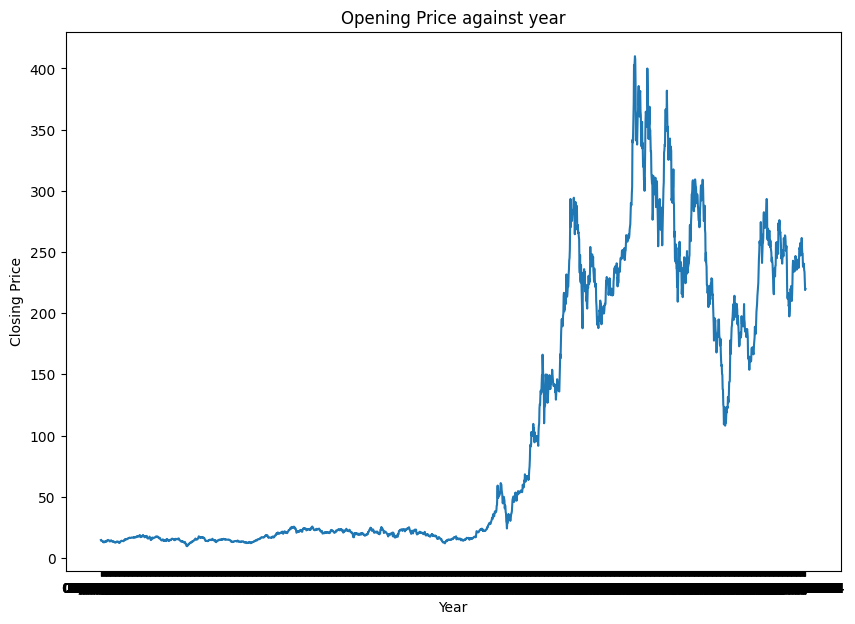

In [10]:
plt.figure(figsize = (10,7))
plt.plot(df['Date'],df['Close'])
plt.xlabel("Year")
plt.ylabel("Closing Price")
plt.title("Opening Price against year")
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split 

In [12]:
X = df.drop(['Date','Close'], axis = 1)
X

,Open,High,Low,Volume
0,14.858000,14.883333,14.217333,71466000
1,14.303333,14.433333,13.810667,80527500
2,14.004000,14.280000,13.614000,93928500
3,14.223333,14.318667,13.985333,44526000
4,14.187333,14.253333,14.000667,51637500
...,...,...,...,...
2269,238.110001,238.960007,232.039993,96705700
2270,235.100006,235.500000,231.289993,91628500
2271,230.570007,230.929993,225.369995,105873600
2272,220.080002,225.339996,217.149994,122889000


In [13]:
y = df.Close
y

0        14.620667
1        14.006000
2        14.085333
3        14.063333
4        14.041333
           ...    
2269    234.960007
2270    233.940002
2271    227.220001
2272    218.889999
2273    219.910004
Name: Close, Length: 2274, dtype: float64

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1)

In [15]:
X_train

,Open,High,Low,Volume
660,24.200001,24.433332,24.167999,51207000
995,25.000000,25.191334,24.288668,95064000
1652,221.133331,222.166672,209.080002,98439900
1196,15.457333,15.632000,14.952000,226267500
788,22.298000,22.722668,22.100000,60141000
...,...,...,...,...
960,20.070000,20.296000,19.048668,300874500
905,22.922667,25.830668,22.610001,463137000
1096,15.467333,15.498000,14.966667,162522000
235,15.168000,15.253333,14.946667,40314000


In [16]:
y_train

660      24.194000
995      24.380667
1652    214.926666
1196     15.535333
788      22.318001
           ...    
960      19.233334
905      25.304667
1096     15.134000
235      15.114667
1061     17.635332
Name: Close, Length: 1819, dtype: float64

In [17]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [18]:
X_test

,Open,High,Low,Volume
1298,47.417332,49.579334,45.778000,302925000
107,16.723333,17.250000,16.687332,75255000
1087,16.137333,16.280666,15.800000,141969000
1156,15.100000,15.571333,15.053333,71647500
1907,301.276672,311.876679,295.000000,117042900
...,...,...,...,...
2173,240.250000,240.820007,229.550003,130597900
921,20.684668,20.790001,20.246000,111711000
2143,268.649994,270.899994,266.369995,91972400
1847,301.313324,318.500000,295.093323,81643800


In [19]:
y_test ## Actual y-value

1298     49.574669
107      17.086000
1087     15.912667
1156     15.561333
1907    297.276672
           ...    
2173    233.190002
921      20.334000
2143    269.790008
1847    317.540008
1644    216.866669
Name: Close, Length: 455, dtype: float64

In [20]:
y_pred = model.predict(X_test)
y_pred

array([ 48.17449567,  17.14733763,  16.06498323,  15.46538155,
       305.12189001,  20.94096796,  22.9490888 , 247.12049628,
        18.27875651,  18.49433007,  17.43259548,  16.30367552,
       299.16493844,  13.232236  , 341.94971237, 160.37360414,
       224.38955241,  13.17210862, 247.2949536 ,  17.29070347,
       197.92607295,  12.95488723,  13.43451765,  23.39871119,
        16.62701039,  19.70194154,  23.12118213,  12.25569057,
       168.52036233,  34.19324104, 220.22586834,  12.73367583,
        58.18809889,  13.78043469, 182.67837759,  15.65828487,
       236.8326055 ,  15.52309954, 326.92721619, 166.87929676,
        14.32065722, 247.75216525, 238.49928608,  23.16227487,
       292.87462989,  12.60286696,  16.67034419,  21.72514481,
        16.37418151,  13.50365706, 302.88257441,  21.04522865,
        22.26771706,  23.98648018,  20.76022287,  14.43761352,
       375.59692829,  22.90573684,  14.81031723, 254.7166252 ,
        19.52894852,  21.4467097 ,  23.88534793,  18.60

In [21]:
loss = mse(y_pred,y_test)
loss

3.285340913318415

In [22]:
print("Accuracy of the model is:",round(100-loss,2),"%")

Accuracy of the model is: 96.71 %


In [23]:
model.predict([[14.28,14.59,14.10,47707500]])

C:\Users\NEVILLE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.37470896])

In [24]:
model.predict([[14,15,14,47707500]])

C:\Users\NEVILLE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.82886278])

In [25]:
import joblib

In [26]:
joblib.dump(model,'tesla_prediction')

['tesla_prediction']

In [27]:
tp = joblib.load('tesla_prediction')

In [28]:
tp.predict([[14,15,14,47707500]])

C:\Users\NEVILLE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.82886278])

In [ ]:
model.predict